The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 




In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
path = "https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv"


In [3]:
titanic_train = pd.read_csv(path)
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Analysis


In [4]:
titanic_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation



In [5]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of data-set survived the Titanic. 
We can also see age range from 4 to 80.
We can find that data contain missing values, like the ‘Age’ feature.


# Quick Analysis of the Dataset / Summery


In [7]:
titanic_train.head(8)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Detailed look of Data & what data is actually missing:


In [8]:
total = titanic_train.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_train.isnull().sum()/titanic_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [9]:
titanic_train.columns.values


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [10]:
new_survived=pd.Categorical(titanic_train["Survived"])
new_survived=new_survived.rename_categories(["Died","Survived"])
new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [11]:
new_Pclass=pd.Categorical(titanic_train["Pclass"],
                          ordered=True)
new_Pclass=new_Pclass.rename_categories(["Class1","Class2","Class3"])

In [12]:
new_Pclass.describe()

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [13]:
titanic_train["Pclass"]=new_Pclass

In [14]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
#TO CHECK UNIQUE CABINS
titanic_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [16]:
#CONVER DATA TO STR
char_cabin=titanic_train["Cabin"].astype(str)
#TAKE FIRST LETTER
new_Cabin=np.array([cabin[0] for cabin in char_cabin])
new_Cabin=pd.Categorical(new_Cabin)
new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [17]:
#REASSIGNING NAMES TO CABIN
titanic_train["Cabin"]=new_Cabin

In [18]:
titanic_train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,Class3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,n,S
882,883,0,Class3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,n,S
883,884,0,Class2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,n,S
884,885,0,Class3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,n,S
885,886,0,Class3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,n,Q
886,887,0,Class2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,n,S
887,888,1,Class1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,0,Class3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,n,S
889,890,1,Class1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C
890,891,0,Class3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,n,Q


In [19]:
missing=np.where(titanic_train["Age"].isnull()==True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [20]:
#CHECKING NO OF MISSING DATA
len(missing[0])

177

In [21]:
titanic_train.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,Class1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,C
890,891,0,Class3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,n,Q


In [22]:
#FIND MAX FARE
index=np.where(titanic_train["Fare"]==max(titanic_train["Fare"]))
index


(array([258, 679, 737], dtype=int64),)

In [23]:
titanic_train.loc[index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,n,C
679,680,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C
737,738,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C


In [24]:
titanic_train["Family"]=titanic_train["SibSp"]+titanic_train["Parch"]
most_family=np.where(titanic_train["Family"]==max(titanic_train["Family"]))
titanic_train.loc[most_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
159,160,0,Class3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,n,S,10
180,181,0,Class3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,n,S,10
201,202,0,Class3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,n,S,10
324,325,0,Class3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,n,S,10
792,793,0,Class3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,n,S,10
846,847,0,Class3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,n,S,10
863,864,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,n,S,10


In [25]:
titanic_train.loc[index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
258,259,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,n,C,0
679,680,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,0


In [26]:
titanic_train["Family"]=titanic_train["SibSp"]+titanic_train["Parch"]
most_family=np.where(titanic_train["Family"]==max(titanic_train["Family"]))
titanic_train.loc[most_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
159,160,0,Class3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,n,S,10
180,181,0,Class3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,n,S,10
201,202,0,Class3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,n,S,10
324,325,0,Class3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,n,S,10
792,793,0,Class3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,n,S,10
846,847,0,Class3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,n,S,10
863,864,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,n,S,10


In [27]:
titanic_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype=object)

See the 11 features & the target variable (survived). What features contribute to a high survival rate ?
It would make sense if everything except ‘PassengerId’, ‘Ticket’ and ‘Name’ would be correlated with a high survival rate.


# Age and Sex:


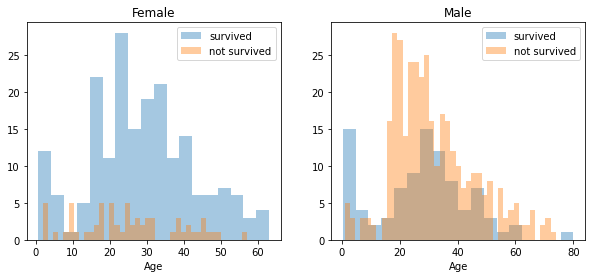

In [28]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_train[titanic_train['Sex']=='female']
men = titanic_train[titanic_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


#men have a high probability of survival age between 18 and 30 years old
#women survival chances are higher between 14 and 40
#men survival is very low between the age of 5 and 18
#infants also have higher probablity of survival 



# Embarked, Pclass and Sex:


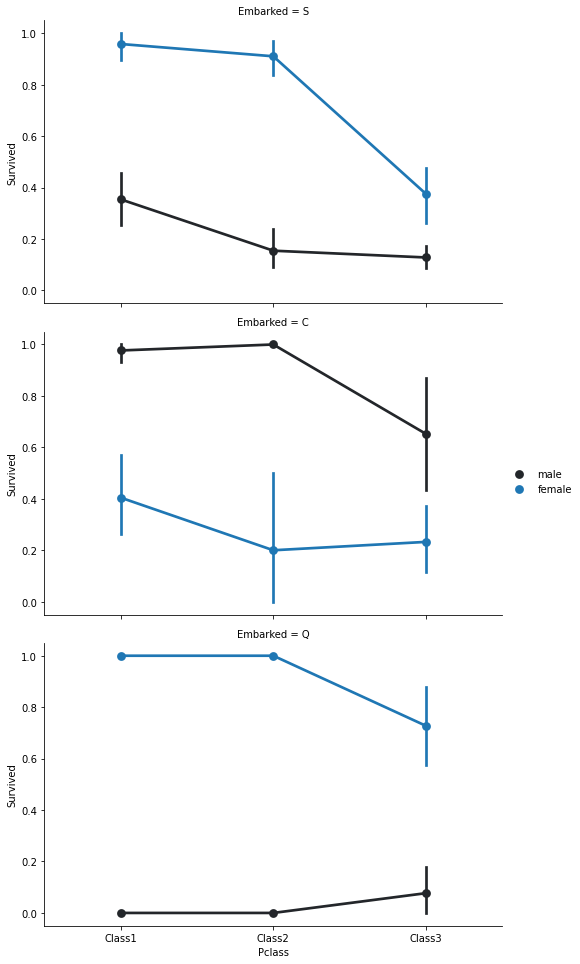

In [29]:
FacetGrid = sns.FacetGrid(titanic_train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()


#Embarked showing to be correlated with survival, depending on the gender
#Pclass also seems to be correlated with survival
#Women on port Q and on port S have a higher chance of survival
#Men have a high survival chances if they are on port C, but a low if they are on port Q or S

# Pclass:


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

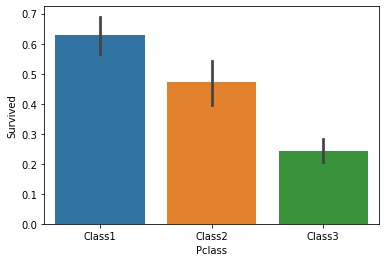

In [30]:
sns.barplot(x='Pclass', y='Survived', data=titanic_train)


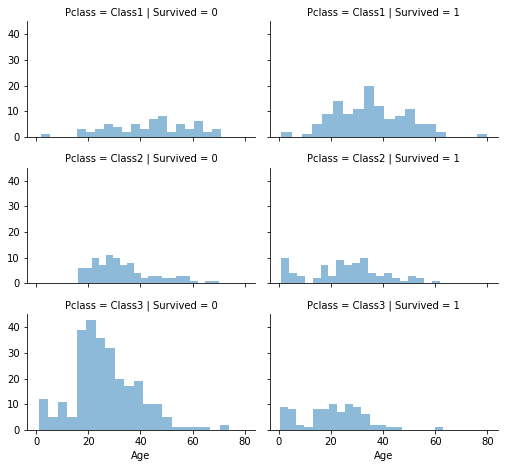

In [31]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


Its showing high probability that a person in pclass 3 will not survive

# DATA PREPROCESSING & MISSING DATA


In [32]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S,1
1,2,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S,0
3,4,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1
4,5,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Class2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,n,S,0
887,888,1,Class1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,0
888,889,0,Class3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,n,S,3
889,890,1,Class1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,0


In [33]:
titanic_train = titanic_train.drop(columns='Cabin', axis=1)

In [34]:
titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace=True)

In [35]:
print(titanic_train['Embarked'].mode())

0    S
dtype: object


In [36]:
titanic_train['Embarked'].fillna(titanic_train['Embarked'].mode()[0], inplace=True)

In [37]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family         0
dtype: int64

# Transforming data into a categorical column.



In [38]:
titanic_train.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,13.002015,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,10.000000


# FINDING NO OF PEOPLE SURVIVED

In [39]:
new_survived=pd.Categorical(titanic_train["Survived"])
new_survived=new_survived.rename_categories(["Died","Survived"])
new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [40]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

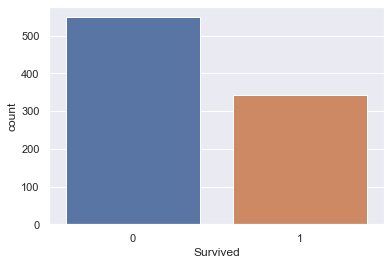

In [41]:
sns.countplot('Survived',data=titanic_train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

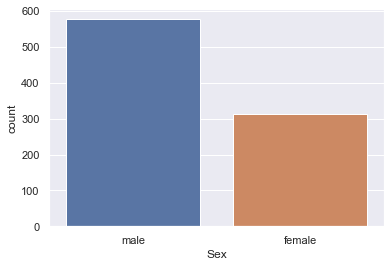

In [42]:
sns.countplot('Sex',data=titanic_train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

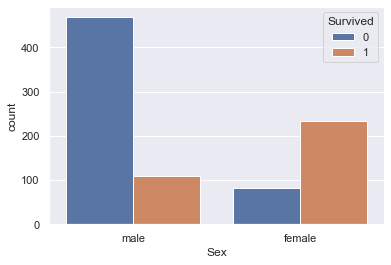

In [43]:
sns.countplot('Sex',hue='Survived',data=titanic_train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

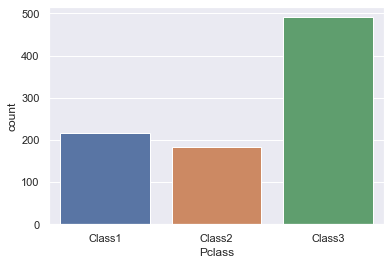

In [44]:
sns.countplot('Pclass',data=titanic_train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

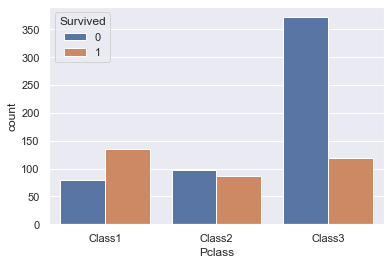

In [45]:
sns.countplot('Pclass',hue='Survived',data=titanic_train)

In [46]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,Class3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,1,Class3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,0,Class3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Class2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,Class1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0
888,889,0,Class3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,3
889,890,1,Class1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0


In [47]:
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [48]:
titanic_train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
titanic_train.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':0,'Q':2}},inplace=True)

In [54]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,Class3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,1
2,3,1,Class3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,Class3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


In [58]:
titanic_train.replace({'Pclass':{'Class1':1,'Class2':2,'Class3':3}},inplace=True)

In [59]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


# SEPERATING FEATURES & TARGET

In [60]:
X = titanic_train.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)

In [63]:
Y = titanic_train['Survived']

In [61]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Family
0         3    0  22.000000      1      0   7.2500         0       1
1         1    1  38.000000      1      0  71.2833         0       1
2         3    1  26.000000      0      0   7.9250         0       0
3         1    1  35.000000      1      0  53.1000         0       1
4         3    0  35.000000      0      0   8.0500         0       0
..      ...  ...        ...    ...    ...      ...       ...     ...
886       2    0  27.000000      0      0  13.0000         0       0
887       1    1  19.000000      0      0  30.0000         0       0
888       3    1  29.699118      1      2  23.4500         0       3
889       1    0  26.000000      0      0  30.0000         0       0
890       3    0  32.000000      0      0   7.7500         2       0

[891 rows x 8 columns]


In [64]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


# Spliting data into Training data & Test data


In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [71]:
print(X.shape,X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


# Model Training / Logistic Regression

In [78]:
model=LogisticRegression()

In [90]:
model.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation

In [81]:
X_train_prediction=model.predict(X_train)

In [82]:
X_train_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [88]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy Score of training data :',training_data_accuracy)

Accuracy Score of training data : 0.8117977528089888


In [87]:
X_test_prediction = model.predict(X_test)

In [85]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [89]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy Score of test data :',test_data_accuracy)

Accuracy Score of test data : 0.7597765363128491
